In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu (thay 'your_data.csv' bằng tên file thực tế)
df = pd.read_csv('D://github//ETL_real_estate//notebooks//processed_real_estate_data (1).csv')

# Hiển thị thông tin tổng quan
print("Số dòng và cột:", df.shape)
print("\nThông tin các cột:")
df.info()
df.head(5)

Số dòng và cột: (53540, 19)

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53540 entries, 0 to 53539
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_value              53540 non-null  float64
 1   post_type               53540 non-null  object 
 2   property_type           53540 non-null  object 
 3   is_available            53540 non-null  bool   
 4   description_length      53540 non-null  int64  
 5   description_word_count  53540 non-null  int64  
 6   bedrooms_value          53540 non-null  float64
 7   bathrooms_value         53540 non-null  float64
 8   floors_value            53540 non-null  float64
 9   direction               53540 non-null  object 
 10  balcony_direction       53540 non-null  object 
 11  road_width_value        53540 non-null  float64
 12  house_front_value       53540 non-null  float64
 13  width_value             53540 non-null  flo

,area_value,post_type,property_type,is_available,description_length,description_word_count,bedrooms_value,bathrooms_value,floors_value,direction,balcony_direction,road_width_value,house_front_value,width_value,length_value,city,district,amenities_count,price_normalized_vnd
0,102.5,Tin thường,Đất nền,True,673,155,3.0,3.0,5.0,Nam,Đông - Nam,30.0,5.0,5.0,18.5,Hồ Chí Minh,9,1,7.687500e+06
1,80.0,Tin thường,Căn hộ chung cư,True,1599,354,2.0,2.0,12.0,Đông - Nam,Đông - Nam,7.0,5.0,5.0,18.5,Hồ Chí Minh,Bình Chánh,4,2.500000e+09
2,80.0,Tin thường,Đất nền,True,2307,532,3.0,3.0,5.0,Đông - Nam,Đông - Nam,12.0,6.0,5.0,18.5,Bình Dương,Dĩ An,0,8.000000e+05
3,100.0,Tin thường,Đất nền,True,1263,296,3.0,3.0,5.0,Đông - Nam,Đông - Nam,12.0,6.0,5.0,18.5,Bình Dương,Dĩ An,1,1.000000e+06
4,110.0,Tin thường,Căn hộ chung cư,True,242,58,3.0,2.0,12.0,Đông - Nam,Đông - Nam,7.0,5.0,5.0,18.5,Hồ Chí Minh,Phú Nhuận,1,6.300000e+03


In [3]:
df = df[df['area_value'] >= 3]
df = df[df['price_normalized_vnd'] >= 100000000]

In [4]:
print(df.shape)

(48117, 19)


In [5]:
print((df['area_value'] < 3).sum())  # nên ra 0

0


In [6]:
import pandas as pd

# Giả sử df là DataFrame của bạn
condition = df['price_normalized_vnd'] < 500000000

# In ra một vài dòng để kiểm tra trước khi thay đổi
print("Trước khi cập nhật:")
print(df.loc[condition, ['area_value', 'price_normalized_vnd']].head())

# Cập nhật lại giá trị
df.loc[condition, 'price_normalized_vnd'] = df.loc[condition, 'price_normalized_vnd'] * df.loc[condition, 'area_value']

# Kiểm tra lại sau khi cập nhật
print("Sau khi cập nhật:")
print(df.loc[condition, ['area_value', 'price_normalized_vnd']].head())


Trước khi cập nhật:
       area_value  price_normalized_vnd
35870       120.0           114000000.0
Sau khi cập nhật:
       area_value  price_normalized_vnd
35870       120.0          1.368000e+10


In [7]:
print(df[df['price_normalized_vnd'] < 500000000].head())  # không nên còn dòng nào dưới 500 triệu nữa

Empty DataFrame
Columns: [area_value, post_type, property_type, is_available, description_length, description_word_count, bedrooms_value, bathrooms_value, floors_value, direction, balcony_direction, road_width_value, house_front_value, width_value, length_value, city, district, amenities_count, price_normalized_vnd]
Index: []


In [8]:
print(df['area_value'].describe())

count    48117.000000
mean        76.459458
std         30.766107
min          3.000000
25%         54.000000
50%         75.600000
75%         91.000000
max        176.000000
Name: area_value, dtype: float64


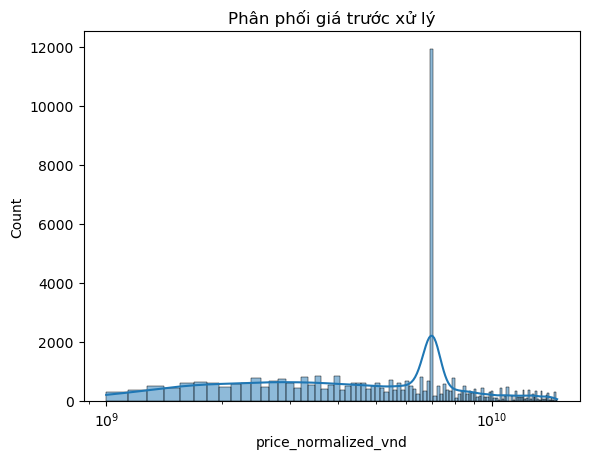

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Histogram giá gốc
sns.histplot(df["price_normalized_vnd"], bins=100, kde=True)
plt.title("Phân phối giá trước xử lý")
plt.xscale("log")  # scale log để nhìn rõ hơn
plt.show()


In [10]:
df["price_normalized_vnd"].min()

1000000000.0

In [11]:
# Giới hạn dưới và trên (VD: giữ trong khoảng từ 10 triệu đến 100 tỷ)
lower_bound = 1e7   # 10 triệu
upper_bound = 1e11  # 100 tỷ

df = df[(df["price_normalized_vnd"] >= lower_bound) & (df["price_normalized_vnd"] <= upper_bound)]


In [12]:
df["log_price"] = np.log1p(df["price_normalized_vnd"])  # log(1 + price)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score



# Đặc trưng đầu vào (loại bỏ cả target và post_type)
X = df.drop(columns=["price_normalized_vnd", "log_price"])
X = pd.get_dummies(X)  # Xử lý biến phân loại
y = df["log_price"]

# Tách tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# # Đọc dữ liệu
# df = pd.read_csv("/kaggle/input/estate/processed_real_estate_data (1).csv")  # Đổi tên file nếu cần

# Xóa cột post_type nếu không cần dùng
# df = df.drop(columns=["post_type"])

# Phân chia biến đầu vào và đầu ra
X = df.drop(columns=["price_normalized_vnd", "log_price"])
y = df["log_price"]

# Chia kiểu biến
numeric_features = X.select_dtypes(include=["float64", "int64", "bool"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Pipeline cho xử lý dữ liệu
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Random Forest pipeline
rf_model = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))])
rf_model.fit(X_train, y_train)

# Evaluation function
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}, R²: {r2:.4f}")

print("\nRandom Forest:")
evaluate(rf_model, X_test, y_test)


Random Forest:
RMSE: 0.13, R²: 0.6113


In [16]:
import joblib

# Lưu mô hình Random Forest pipeline vào file
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression pipeline
lr_model = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", LinearRegression())])
lr_model.fit(X_train, y_train)

# Random Forest pipeline
rf_model = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))])
rf_model.fit(X_train, y_train)

# Lasso Regression pipeline
lasso_model = Pipeline(steps=[("preprocessor", preprocessor),
                              ("regressor", Lasso(alpha=1.0))])
lasso_model.fit(X_train, y_train)

# Ridge Regression pipeline
ridge_model = Pipeline(steps=[("preprocessor", preprocessor),
                              ("regressor", Ridge(alpha=1.0, solver="lsqr"))])
ridge_model.fit(X_train, y_train)

# SVR with linear kernel
svr_linear_model = Pipeline(steps=[("preprocessor", preprocessor),
                                   ("regressor", SVR(kernel="linear", C=1.0))])
svr_linear_model.fit(X_train, y_train)

# SVR with Gaussian (RBF) kernel
svr_rbf_model = Pipeline(steps=[("preprocessor", preprocessor),
                                ("regressor", SVR(kernel="rbf", C=1.0, gamma="scale"))])
svr_rbf_model.fit(X_train, y_train)

# Evaluation function
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Evaluate all models
print("Linear Regression:")
evaluate(lr_model, X_test, y_test)

print("\nRandom Forest:")
evaluate(rf_model, X_test, y_test)

print("\nLasso Regression:")
evaluate(lasso_model, X_test, y_test)

print("\nRidge Regression:")
evaluate(ridge_model, X_test, y_test)

print("\nSVR (Linear Kernel):")
evaluate(svr_linear_model, X_test, y_test)

print("\nSVR (Gaussian/RBF Kernel):")
evaluate(svr_rbf_model, X_test, y_test)


Linear Regression:
RMSE: 0.43, R²: 0.4450

Random Forest:
RMSE: 0.36, R²: 0.6112

Lasso Regression:
RMSE: 0.57, R²: -0.0001

Ridge Regression:
RMSE: 0.42, R²: 0.4486

SVR (Linear Kernel):
RMSE: 0.43, R²: 0.4284

SVR (Gaussian/RBF Kernel):
RMSE: 0.37, R²: 0.5814


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline


to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)


# Thêm bước PCA vào pipeline
pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai)  # Số thành phần chính, có thể điều chỉnh

# Linear Regression pipeline with PCA
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("to_dense", to_dense),
    ("pca", pca),
    ("regressor", LinearRegression())
])
lr_model.fit(X_train, y_train)

# Random Forest pipeline with PCA
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("to_dense", to_dense),
    ("pca", pca),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_model.fit(X_train, y_train)

# Lasso Regression pipeline with PCA
lasso_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("to_dense", to_dense),
    ("pca", pca),
    ("regressor", Lasso(alpha=1.0))
])
lasso_model.fit(X_train, y_train)

# Ridge Regression pipeline with PCA
ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("to_dense", to_dense),
    ("pca", pca),
    ("regressor", Ridge(alpha=1.0, solver="lsqr"))
])
ridge_model.fit(X_train, y_train)

# SVR with linear kernel and PCA
svr_linear_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("to_dense", to_dense),
    ("pca", pca),
    ("regressor", SVR(kernel="linear", C=1.0))
])
svr_linear_model.fit(X_train, y_train)

# SVR with Gaussian (RBF) kernel and PCA
svr_rbf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("to_dense", to_dense),
    ("pca", pca),
    ("regressor", SVR(kernel="rbf", C=1.0, gamma="scale"))
])
svr_rbf_model.fit(X_train, y_train)

# Evaluation function (giữ nguyên)
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Evaluate all models
print("Linear Regression with PCA:")
evaluate(lr_model, X_test, y_test)

print("\nRandom Forest with PCA:")
evaluate(rf_model, X_test, y_test)

print("\nLasso Regression with PCA:")
evaluate(lasso_model, X_test, y_test)

print("\nRidge Regression with PCA:")
evaluate(ridge_model, X_test, y_test)

print("\nSVR (Linear Kernel) with PCA:")
evaluate(svr_linear_model, X_test, y_test)

print("\nSVR (Gaussian/RBF Kernel) with PCA:")
evaluate(svr_rbf_model, X_test, y_test)


Linear Regression with PCA:
RMSE: 0.47, R²: 0.3199

Random Forest with PCA:
RMSE: 0.39, R²: 0.5461

Lasso Regression with PCA:
RMSE: 0.57, R²: -0.0001

Ridge Regression with PCA:
RMSE: 0.47, R²: 0.3199

SVR (Linear Kernel) with PCA:
RMSE: 0.48, R²: 0.2975

SVR (Gaussian/RBF Kernel) with PCA:
RMSE: 0.41, R²: 0.4874


In [15]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline


to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)


# Thêm bước PCA vào pipeline
pca = PCA(n_components=10)  # Giữ lại 95% phương sai)  # Số thành phần chính, có thể điều chỉnh
warnings.filterwarnings("ignore")  # Ẩn cảnh báo cho CatBoost

# XGBoost
xgb_model = Pipeline(steps=[("preprocessor", preprocessor),
                            ("to_dense", to_dense),
                            ("pca", pca),
                            ("regressor", XGBRegressor(n_estimators=100, learning_rate=0.1,
                                                       max_depth=6, random_state=42))])
xgb_model.fit(X_train, y_train)

print("XGBoost:")
evaluate(xgb_model, X_test, y_test)

# LightGBM
lgb_model = Pipeline(steps=[("preprocessor", preprocessor),
                            ("regressor", LGBMRegressor(n_estimators=100, learning_rate=0.1,
                                                        max_depth=6, random_state=42))])
lgb_model.fit(X_train, y_train)

print("LightGBM:")
evaluate(lgb_model, X_test, y_test)

# CatBoost (CatBoost xử lý trực tiếp categorical nên không cần pipeline, ta xử lý riêng)
categorical_idxs = [X.columns.get_loc(col) for col in categorical_features]  # chỉ số cột object

cat_model = CatBoostRegressor(verbose=0,
                              iterations=100,
                              learning_rate=0.1,
                              depth=6,
                              random_state=42)
cat_model.fit(X_train, y_train, cat_features=categorical_idxs)

# Dự đoán
y_pred_cat = cat_model.predict(X_test)
rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)
r2_cat = r2_score(y_test, y_pred_cat)
print(f"CatBoost RMSE: {rmse_cat:.2f}, R²: {r2_cat:.4f}")


XGBoost:
RMSE: 0.38, R²: 0.5534
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1673
[LightGBM] [Info] Number of data points in the train set: 38493, number of used features: 215
[LightGBM] [Info] Start training from score 22.422248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


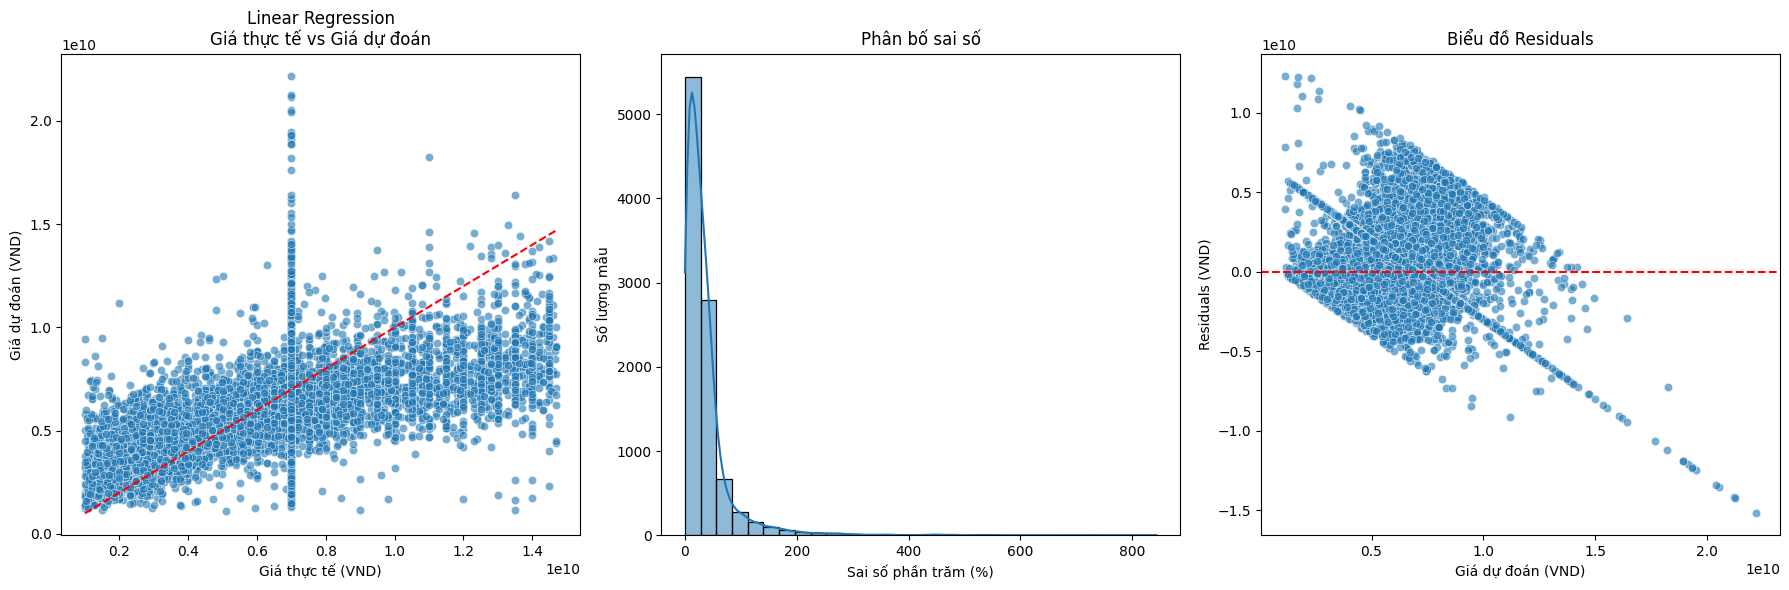


Linear Regression:
- RMSE (VND): 2,458,205,167
- R²: 0.3626
- Sai số trung bình: 35.05%
- Sai số trung vị: 24.03%
----------------------------------------


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


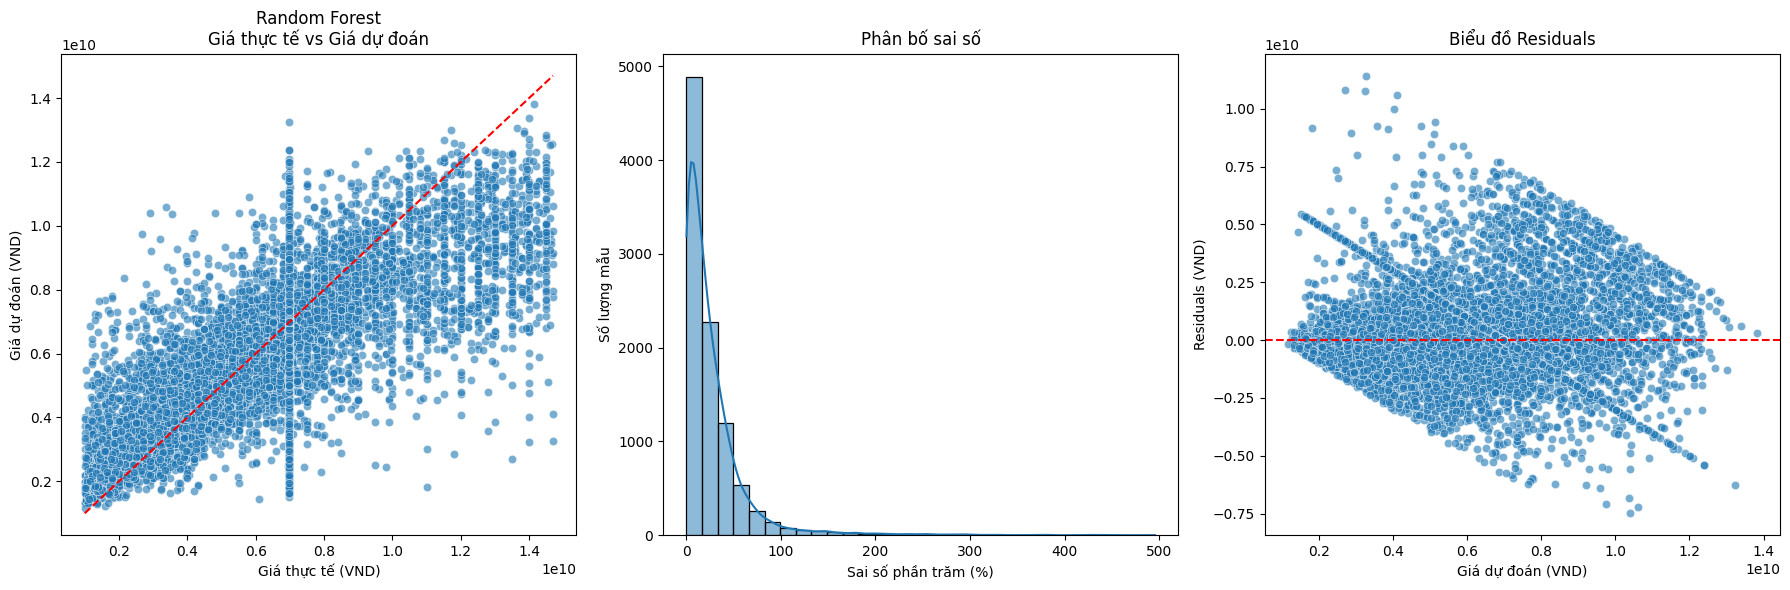


Random Forest:
- RMSE (VND): 1,980,540,182
- R²: 0.5863
- Sai số trung bình: 26.20%
- Sai số trung vị: 16.08%
----------------------------------------


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


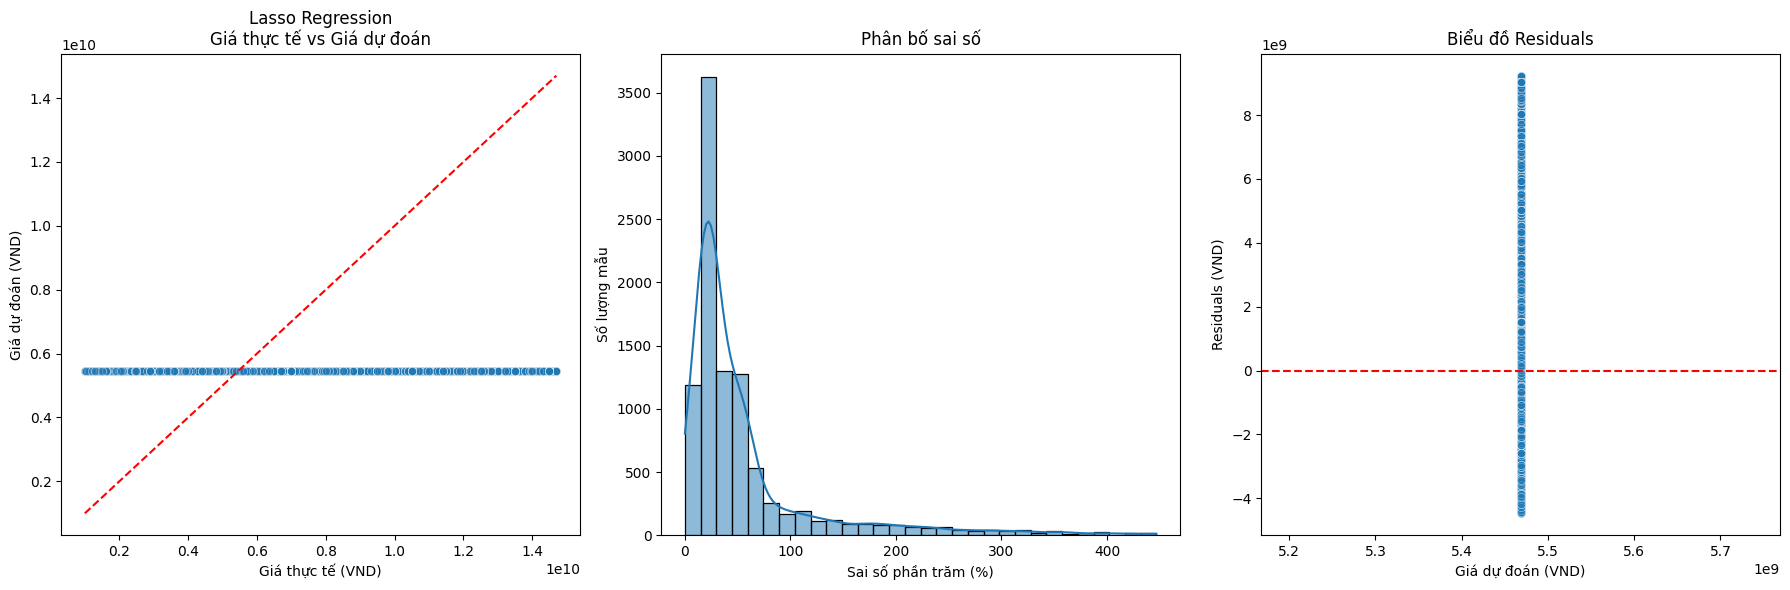


Lasso Regression:
- RMSE (VND): 3,200,158,073
- R²: -0.0802
- Sai số trung bình: 56.18%
- Sai số trung vị: 29.89%
----------------------------------------


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


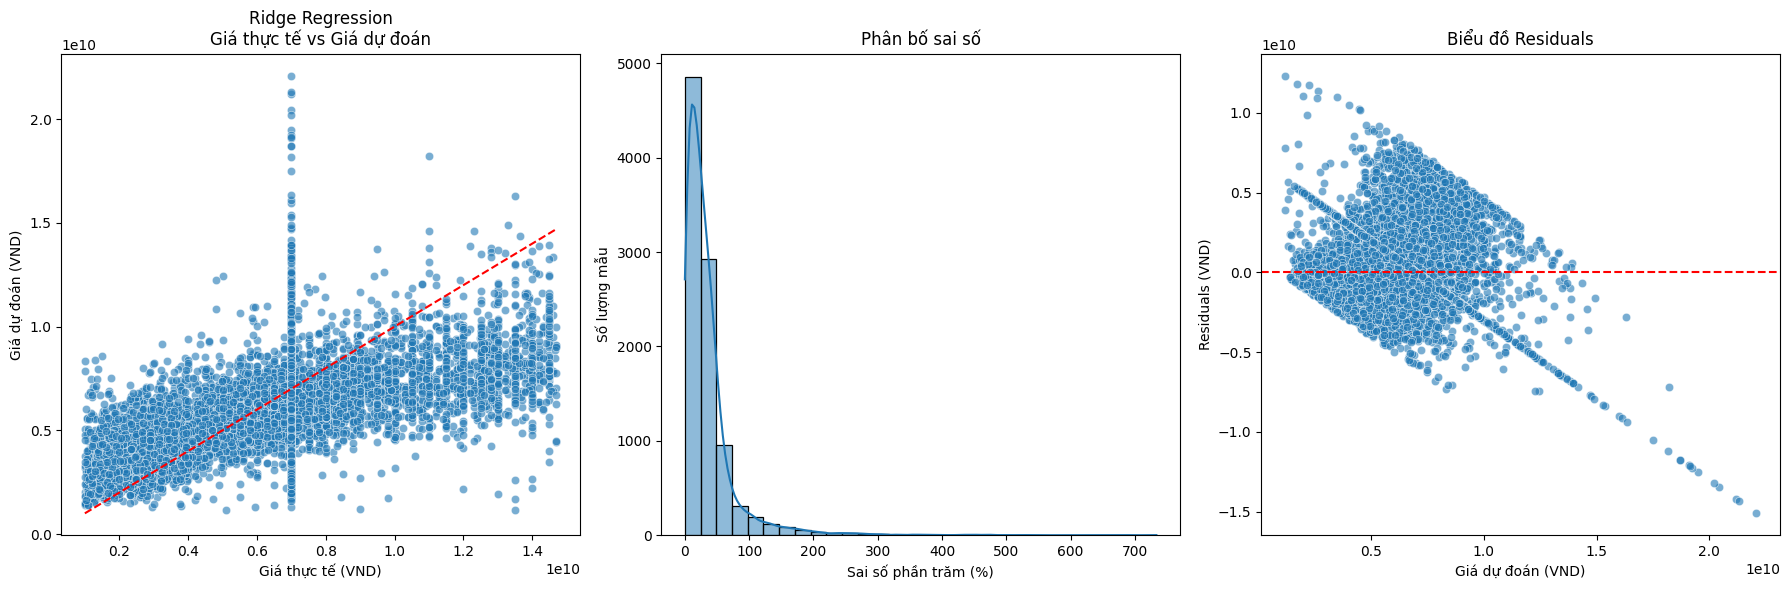


Ridge Regression:
- RMSE (VND): 2,451,989,580
- R²: 0.3658
- Sai số trung bình: 35.04%
- Sai số trung vị: 24.15%
----------------------------------------


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


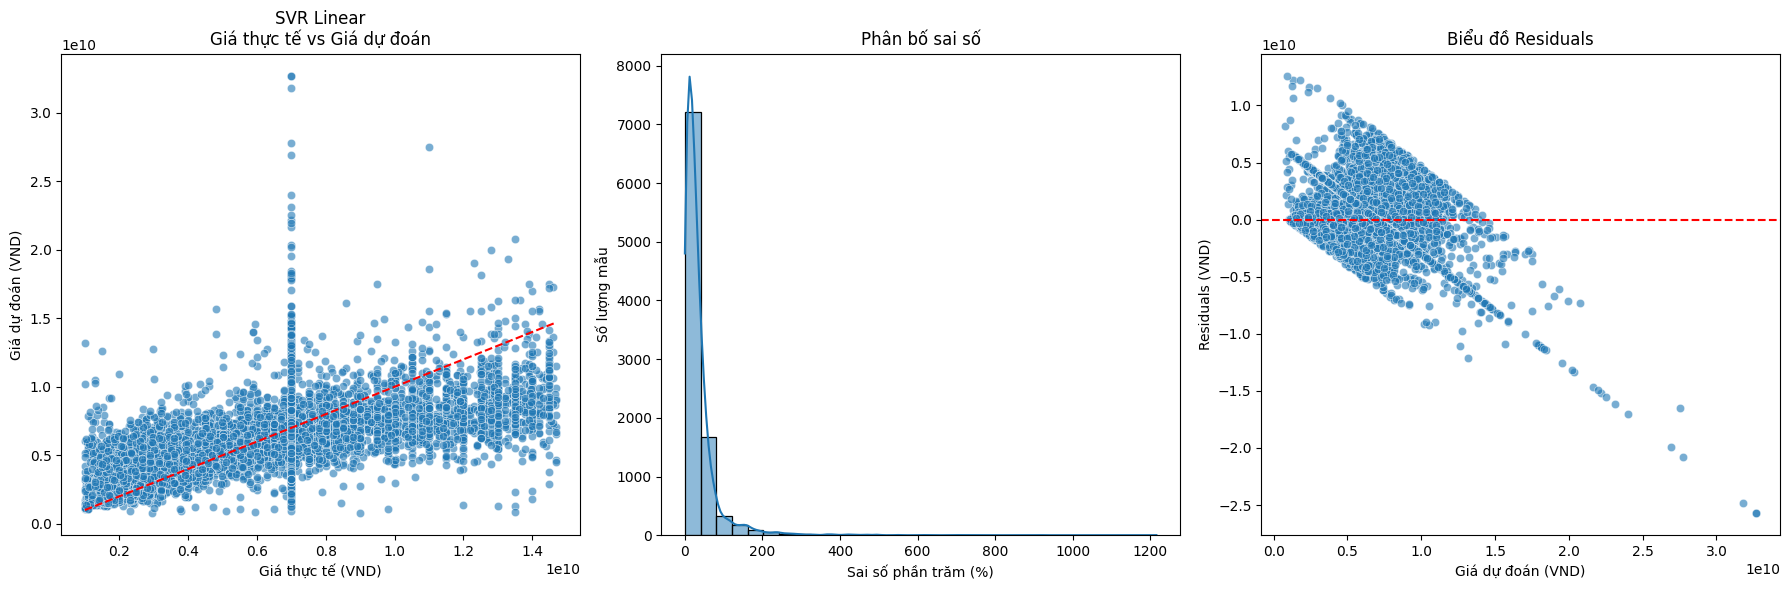


SVR Linear:
- RMSE (VND): 2,520,965,376
- R²: 0.3297
- Sai số trung bình: 34.91%
- Sai số trung vị: 22.36%
----------------------------------------


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


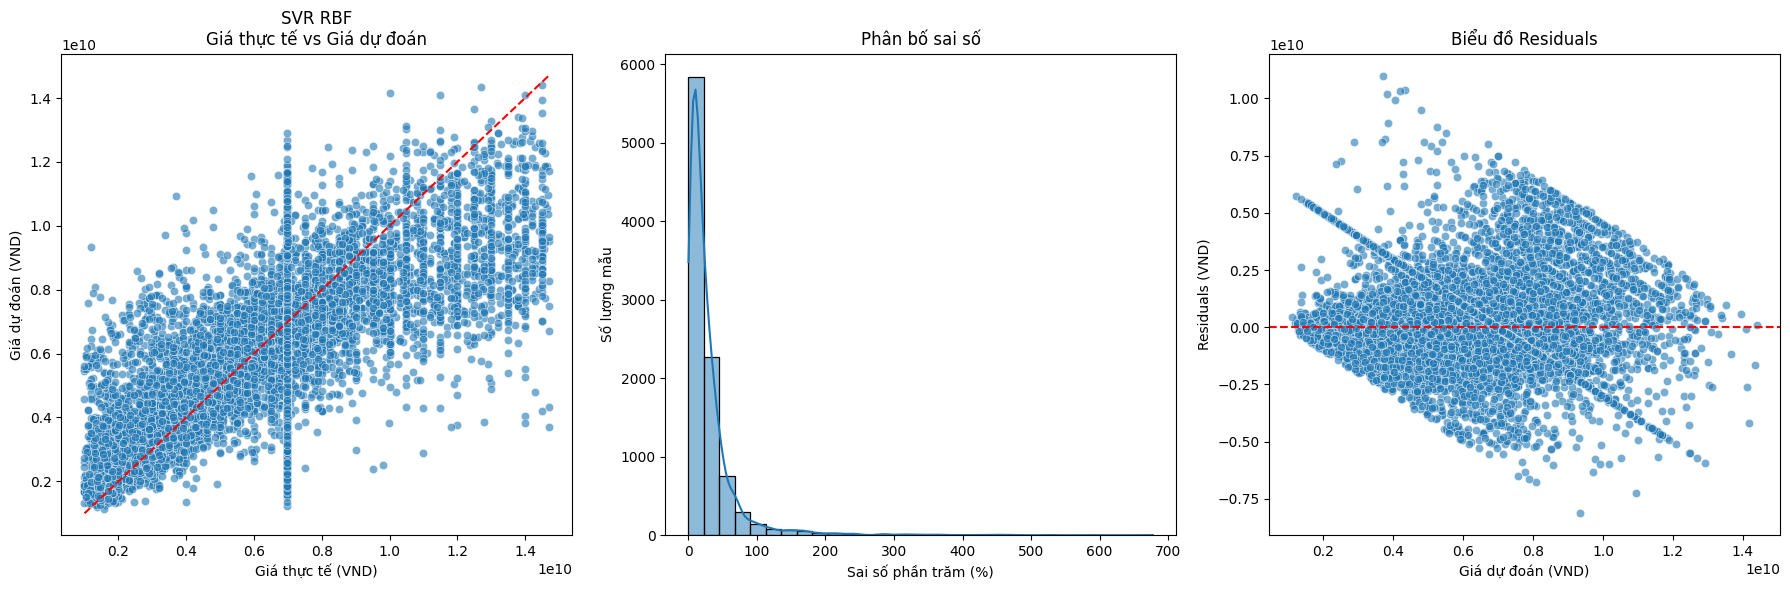


SVR RBF:
- RMSE (VND): 2,017,400,866
- R²: 0.5707
- Sai số trung bình: 28.32%
- Sai số trung vị: 16.76%
----------------------------------------


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hàm chuyển đổi từ log price về giá trị gốc
def convert_log_to_price(log_value):
    return np.exp(log_value)

# Tạo dictionary chứa tất cả các model
models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'Lasso Regression': lasso_model,
    'Ridge Regression': ridge_model,
    'SVR Linear': svr_linear_model,
    'SVR RBF': svr_rbf_model
}

# Vẽ biểu đồ cho từng model
for name, model in models.items():
    # Dự đoán trên tập test
    y_pred = model.predict(X_test)
    
    # Chuyển đổi về giá trị thực (VND)
    y_test_actual = convert_log_to_price(y_test)
    y_pred_actual = convert_log_to_price(y_pred)
    
    # Tính toán sai số phần trăm
    error = np.abs(y_test_actual - y_pred_actual) / y_test_actual * 100
    
    # Tạo figure với 2 subplots
    plt.figure(figsize=(18, 6))
    
    # Subplot 1: So sánh giá trị thực và dự đoán
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.6)
    plt.plot([min(y_test_actual), max(y_test_actual)], 
             [min(y_test_actual), max(y_test_actual)], 
             '--', color='red')
    plt.xlabel('Giá thực tế (VND)')
    plt.ylabel('Giá dự đoán (VND)')
    plt.title(f'{name}\nGiá thực tế vs Giá dự đoán')
    
    # Subplot 2: Phân bố sai số
    plt.subplot(1, 3, 2)
    sns.histplot(error, bins=30, kde=True)
    plt.xlabel('Sai số phần trăm (%)')
    plt.ylabel('Số lượng mẫu')
    plt.title('Phân bố sai số')
    
    # Subplot 3: Residual plot
    plt.subplot(1, 3, 3)
    residuals = y_test_actual - y_pred_actual
    sns.scatterplot(x=y_pred_actual, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Giá dự đoán (VND)')
    plt.ylabel('Residuals (VND)')
    plt.title('Biểu đồ Residuals')
    
    plt.tight_layout()
    plt.show()
    
    # In các thống kê quan trọng
    print(f"\n{name}:")
    print(f"- RMSE (VND): {np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)):,.0f}")
    print(f"- R²: {r2_score(y_test_actual, y_pred_actual):.4f}")
    print(f"- Sai số trung bình: {np.mean(error):.2f}%")
    print(f"- Sai số trung vị: {np.median(error):.2f}%")
    print("----------------------------------------")

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Dữ liệu sau khi transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Mô hình DNN
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_transformed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1)  # output: giá
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Huấn luyện
history = model.fit(X_train_transformed, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=256,
                    callbacks=[early_stop],
                    verbose=1)

# Đánh giá
y_pred_nn = model.predict(X_test_transformed).flatten()
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Deep Learning RMSE: {rmse_nn:.2f}, R²: {r2_nn:.4f}")


2025-06-08 12:12:53.319927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749384773.527145      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749384773.589195      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-08 12:13:07.392480: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 303.0951 - mae: 15.6809 - val_loss: 2.5410 - val_mae: 0.9001
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16.4342 - mae: 2.7695 - val_loss: 0.9394 - val_mae: 0.6639
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10.7946 - mae: 2.5400 - val_loss: 0.6697 - val_mae: 0.5985
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10.0265 - mae: 2.4627 - val_loss: 0.5144 - val_mae: 0.5447
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.1176 - mae: 2.4095 - val_loss: 0.3669 - val_mae: 0.4426
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.7745 - mae: 2.3469 - val_loss: 0.4113 - val_mae: 0.5012
Epoch 7/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4395 - mae: 2.3144 - val_loss: 0.3517 - val_mae: 0.4397
Epoch 8/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4249 - mae: 2.3166 - val_loss: 0.4909 - val_mae: 0.5616
Epoch 9/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1